In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

raw_data = pd.read_csv('healthgrades_physicians_GI_NY_raw.csv')
raw_data.to_csv('healthgrades_physicians_GI_NY.csv', index = False)  # do not write index column

In [123]:
data = pd.read_csv('healthgrades_physicians_GI_NY.csv') 

In [124]:
data.shape

(937, 13)

In [125]:
data.columns

Index(['addr_street', 'age', 'city', 'detailed_url', 'featured', 'hcp_id',
       'name', 'num_ins', 'num_reviews', 'practice_addr', 'practice_name',
       'state', 'zipcode'],
      dtype='object')

In [126]:
for field in data.columns:
    print(field, type(data.loc[0,field]))

addr_street <class 'str'>
age <class 'numpy.float64'>
city <class 'str'>
detailed_url <class 'str'>
featured <class 'numpy.int64'>
hcp_id <class 'str'>
name <class 'str'>
num_ins <class 'numpy.float64'>
num_reviews <class 'numpy.int64'>
practice_addr <class 'str'>
practice_name <class 'str'>
state <class 'str'>
zipcode <class 'numpy.int64'>


In [94]:
# def fix_dtype(a):
#     '''
#     change some of data fields that should be integers but were read in as floats due to NaN values
#     a is a panda series
#     '''
#     return a.fillna(-1).astype(int).astype(str).replace('-1',np.nan)

# print(data['num_ins'].dtype)
# print(data['age'].dtype)
# data['num_ins'] = fix_dtype(data['num_ins'])
# data['age'] = fix_dtype(data['age'])
# print(data['num_ins'].dtype)
# print(data['age'].dtype)

float64
float64
object
object


In [127]:
if data['zipcode'].dtype == 'int64':
    data['zipcode'] = data['zipcode'].apply(lambda x: '{0:05d}'.format(x))
data['zipcode']

0      11373
1      07109
2      07024
3      10035
4      10021
5      10003
6      11219
7      10032
8      10021
9      10029
10     11209
11     10002
12     10029
13     11213
14     10016
15     10032
16     11230
17     11213
18     10035
19     10019
20     11373
21     11222
22     11375
23     11420
24     10029
25     11234
26     10075
27     11215
28     11373
29     10314
       ...  
907    10016
908    11224
909    10029
910    06405
911    10024
912    10038
913    10003
914    11217
915    07093
916    10065
917    10032
918    10016
919    11235
920    10314
921    07105
922    10016
923    11228
924    07047
925    11237
926    11105
927    10028
928    10032
929    10065
930    11219
931    11354
932    10017
933    10021
934    10003
935    11373
936    11229
Name: zipcode, Length: 937, dtype: object

In [128]:
pd.set_option('display.max_columns', 50)
data.head(50)

,addr_street,age,city,detailed_url,featured,hcp_id,name,num_ins,num_reviews,practice_addr,practice_name,state,zipcode
0,8708 Justice Ave Ste C6,42.0,Elmhurst,/physician/dr-chuansheng-wang-gfbct,0,dr-chuansheng-wang-gfbct,"Dr. Chuansheng Wang, MD",NaN,6,"8708 Justice Ave Ste C6, Elmhurst, NY, 11373",Elmhurst Digestive and Liver Disease,NY,11373
1,5 Franklin Ave Ste 307,82.0,Belleville,/physician/dr-harry-friedland-xhtcv,0,dr-harry-friedland-xhtcv,"Dr. Harry Friedland, MD",NaN,0,"5 Franklin Ave Ste 307, Belleville, NJ, 07109","HARRY M. FRIEDLAND, M.D.",NJ,07109
2,1555 Center Ave,NaN,Fort Lee,/physician/dr-burton-scherl-gbb66,0,dr-burton-scherl-gbb66,"Dr. Burton Scherl, MD",NaN,0,"1555 Center Ave, Fort Lee, NJ, 07024",NaN,NJ,07024
3,600 E 125th St,74.0,New York,/physician/dr-saroja-singa-y2wbr,0,dr-saroja-singa-y2wbr,"Dr. Saroja Singa, MD",NaN,1,"600 E 125th St, New York, NY, 10035",NaN,NY,10035
4,205 E 76th St Fl M2,83.0,New York,/physician/dr-norton-rosensweig-xs3wc,0,dr-norton-rosensweig-xs3wc,"Dr. Norton Rosensweig, MD",NaN,0,"205 E 76th St Fl M2, New York, NY, 10021",Schwarz and Ammirati Medical Assocs,NY,10021
5,10 Union Sq E Frnt 2J2H,67.0,New York,/physician/dr-william-treem-2cs6r,0,dr-william-treem-2cs6r,"Dr. William Treem, MD",NaN,0,"10 Union Sq E Frnt 2J2H, New York, NY, 10003",Mount Sinai Union Square,NY,10003
6,4802 10th Ave,39.0,Brooklyn,/physician/dr-prasun-shah-gwnq4,0,dr-prasun-shah-gwnq4,"Dr. Prasun Shah, MD",NaN,0,"4802 10th Ave, Brooklyn, NY, 11219",MAIMONIDES MEDICAL CENTER,NY,11219
7,3959 Broadway # 702,46.0,New York,/physician/dr-ali-mencin-2nxjg,0,dr-ali-mencin-2nxjg,"Dr. Ali Mencin, MD",17.0,6,"3959 Broadway # 702, New York, NY, 10032",Columbia University Medical Center Pediatrics,NY,10032
8,1305 York Ave 1283 York Ave,33.0,New York,/providers/annmarie-kieber-emmons-5kkyz,0,annmarie-kieber-emmons-5kkyz,"Dr. Ann Kieber-Emmons, MD",NaN,0,"1305 York Ave 1283 York Ave, New York, NY, 10021",SSM Health Medical Group,NY,10021
9,17 E 102nd St Fl 7th,NaN,New York,/providers/ryan-croteau-cvlcz,0,ryan-croteau-cvlcz,"Dr. Ryan Croteau, MD",NaN,2,"17 E 102nd St Fl 7th, New York, NY, 10029",NaN,NY,10029


In [130]:
# count missing values by column
# np.sum(data.isnull(), axis = 1)
print(np.sum(data.isnull(), axis = 0) / data.shape[0])

addr_street      0.000000
age              0.219851
city             0.000000
detailed_url     0.000000
featured         0.000000
hcp_id           0.000000
name             0.000000
num_ins          0.937033
num_reviews      0.000000
practice_addr    0.000000
practice_name    0.122732
state            0.000000
zipcode          0.000000
dtype: float64


In [131]:
data.describe()[['age','num_reviews']]

,age,num_reviews
count,731.000000,937.000000
mean,58.708618,7.383138
std,13.482964,11.652531
min,29.000000,0.000000
25%,48.000000,0.000000
50%,59.000000,4.000000
75%,68.000000,11.000000
max,98.000000,158.000000


(array([610., 199.,  81.,  21.,   8.,   4.,   4.,   3.,   2.,   2.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,   7.9,  15.8,  23.7,  31.6,  39.5,  47.4,  55.3,  63.2,
         71.1,  79. ,  86.9,  94.8, 102.7, 110.6, 118.5, 126.4, 134.3,
        142.2, 150.1, 158. ]),
 <a list of 20 Patch objects>)

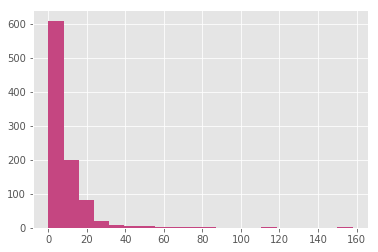

In [132]:
plt.hist(data.num_reviews.dropna(), bins = 20, color = "#c54681")

In [133]:
subdata = data.loc[ data['num_reviews'] > 11 ]

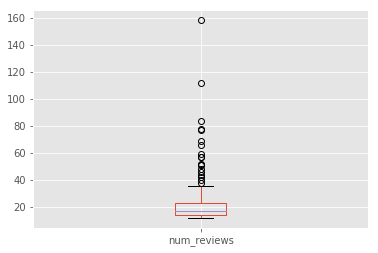

In [137]:
subdata['num_reviews'].plot(kind = 'box')

(array([ 26.,  76.,  98., 113., 137., 146.,  71.,  40.,  20.,   4.]),
 array([29. , 35.9, 42.8, 49.7, 56.6, 63.5, 70.4, 77.3, 84.2, 91.1, 98. ]),
 <a list of 10 Patch objects>)

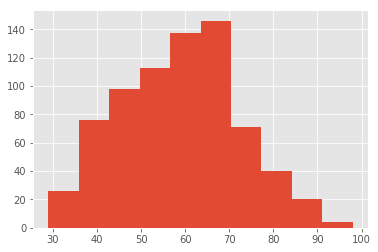

In [138]:
plt.hist(data.age.dropna())

In [139]:
subdata.head()

,addr_street,age,city,detailed_url,featured,hcp_id,name,num_ins,num_reviews,practice_addr,practice_name,state,zipcode
26,903 Park Ave Fl 1,63.0,New York,/physician/dr-susan-lucak-2byyx,0,dr-susan-lucak-2byyx,"Dr. Susan Lucak, MD",NaN,16,"903 Park Ave Fl 1, New York, NY, 10075","Susan Lucak, MD",NY,10075
29,78 Todt Hill Rd Ste 203,68.0,Staten Island,/physician/dr-richard-fazio-ys6qf,0,dr-richard-fazio-ys6qf,"Dr. Richard Fazio, MD",NaN,15,"78 Todt Hill Rd Ste 203, Staten Island, NY, 10314",Richard A Fazio MD,NY,10314
30,928 Broadway Ste 400,40.0,New York,/physician/dr-alexandra-shustina-g9hsp,0,dr-alexandra-shustina-g9hsp,"Dr. Alexandra Shustina, DO",NaN,18,"928 Broadway Ste 400, New York, NY, 10010",Manhattan Integrative Gastroenterology,NY,10010
40,2569 Ocean Ave # 3,52.0,Brooklyn,/physician/dr-yuriy-pertsovsky-xfktn,0,dr-yuriy-pertsovsky-xfktn,"Dr. Yuriy Pertsovsky, MD",NaN,29,"2569 Ocean Ave # 3, Brooklyn, NY, 11229",Lifelong Medical,NY,11229
41,35 E 35th St Rm 200,67.0,New York,/physician/dr-michael-klein-3f9by,0,dr-michael-klein-3f9by,"Dr. Michael Klein, MD",NaN,22,"35 E 35th St Rm 200, New York, NY, 10016",Park Avenue Gastroenterology,NY,10016


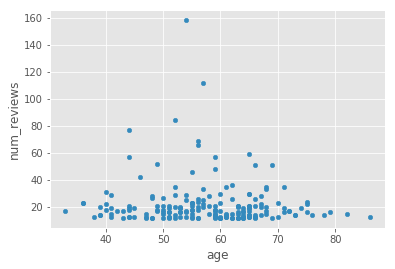

In [140]:
subdata.plot(kind='scatter',x='age', y='num_reviews')